# ==== Consumo de energía de electrodomésticos ====

*  Descripcion del problema:




* INFORMACIÓN DEL CONJUNTO DE DATOS :

El conjunto de datos es de 10 min durante aproximadamente 4,5 meses. Las condiciones de temperatura y humedad de la casa se monitorearon con una red de sensores inalámbricos ZigBee. Cada nodo inalámbrico transmitió las condiciones de temperatura y humedad alrededor de 3,3 min. Luego, los datos inalámbricos se promediaron durante períodos de 10 minutos. Los datos de energía se registraron cada 10 minutos con medidores de energía m-bus. El clima de la estación meteorológica del aeropuerto más cercano (Aeropuerto de Chievres, Bélgica) se descargó de un conjunto de datos públicos de Reliable Prognosis (rp5.ru) y se fusionó con los conjuntos de datos experimentales utilizando la columna de fecha y hora. Se han incluido dos variables aleatorias en el conjunto de datos para probar los modelos de regresión y filtrar los atributos no predictivos (parámetros).

* INFORMACIÓN DE ATRIBUTOS:

* date time year-month-day hour:minute:second (fecha hora año-mes-día hora:minuto:segundo)
* Appliances(Electrodomésticos), energy use in Wh (uso de energía en Wh)
* lights (iluminacion), uso de energía de los artefactos de iluminación en la casa en Wh
* T1, temperatura en el área de la cocina, en Celsius
* RH_1, Humedad en el área de la cocina, en %
* T2, Temperatura en el área de la sala, en Celsius
* RH_2, Humedad en el salón, en %
* T3, Temperatura en zona de lavadero
* RH_3, Humedad en zona de lavadero, en %
* T4, temperatura en la sala de oficina, en grados Celsius
* RH_4, Humedad en sala de oficina, en %
* T5, Temperatura en baño, en Celsius
* RH_5, Humedad en baño, en %
* T6, Temperatura exterior del edificio (lado norte), en Celsius
* RH_6, Humedad exterior del edificio (lado norte), en %
* T7, Temperatura en sala de planchado, en Celsius
* RH_7, Humedad en sala de planchado, en %
* T8, temperatura en la habitación de adolescentes 2, en grados Celsius
* RH_8, Humedad en habitación adolescente 2, en %
* T9, temperatura en la habitación de los padres, en Celsius
* RH_9, Humedad en la habitación de los padres, en %
* A, temperatura exterior (de la estación meteorológica de Chievres), en grados Celsius
* Pressure (Presión de la estación meteorológica de Chievres), en mm Hg
* RH_out, Humedad exterior (de la estación meteorológica de Chievres), en %
* Wind speed( velocidad del viento de la estación meteorológica de Chievres), en m/s
* Visibility (visibilidad desde la estación meteorológica de Chievres), en km
* Tdewpoint (Punto de rocío de la estación meteorológica de Chievres), °C
* rv1, variable aleatoria 1, adimensional
* rv2, variable aleatoria 2, adimensional

Donde se indica, los datos por hora (luego interpolados) de la estación meteorológica del aeropuerto más cercano (Aeropuerto de Chievres, Bélgica) se descargaron de un conjunto de datos públicos de Reliable Prognosis, rp5.ru. Se obtuvo permiso de Reliable Prognosis para la distribución de los 4,5 meses de datos meteorológicos.

## Importando Librerias:

In [25]:
# Importando Librerías Necesarias Para Regresión Con Árboles De Decisión Y Random Forest
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.model_selection import train_test_split

## Inspección de los datos :

In [26]:
# LEYENDO EL CONJUNTO DE DATOS DE EJEMPLOS
df = pd.read_csv('./energydata_complete.csv')

# IMPRIMIENDO LA CABECERA
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## Tabla a Detalle

In [27]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Imprimiendo la cabezera:

In [28]:
print(df.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

### Preprocesamiento de los datos 


* Eliminando la variable Date 

In [29]:
print(df['date'].describe());
print("\n================== ELIMINADA =================\n");
df = df.drop('date', axis=1)
print(df.info())

count                   19735
unique                  19735
top       2016-01-11 17:00:00
freq                        1
Name: date, dtype: object

================== ELIMINADA =================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 

## Verificando la cantidad de valores Nulos:

In [30]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Sacando variables predictoras y variable a predecir:

In [31]:
x = df.drop("Appliances", axis=1)
y = df.iloc[:, 0]

## Observando la distribución de la variable a predecir (y)

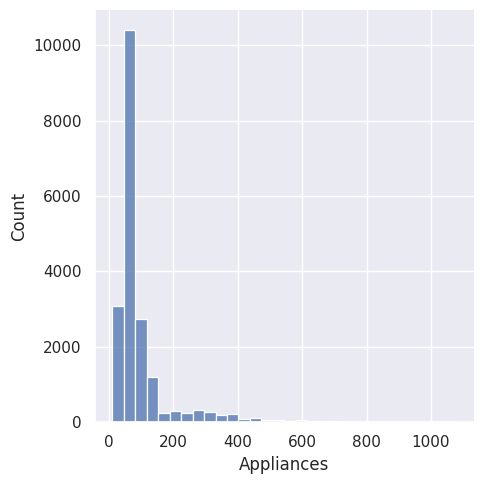

In [32]:
import seaborn as sns 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(y, bins=30)
plt.show()

## Distribución de las variables predictoras (x)

 						 ==== 1ER GRUPO ====



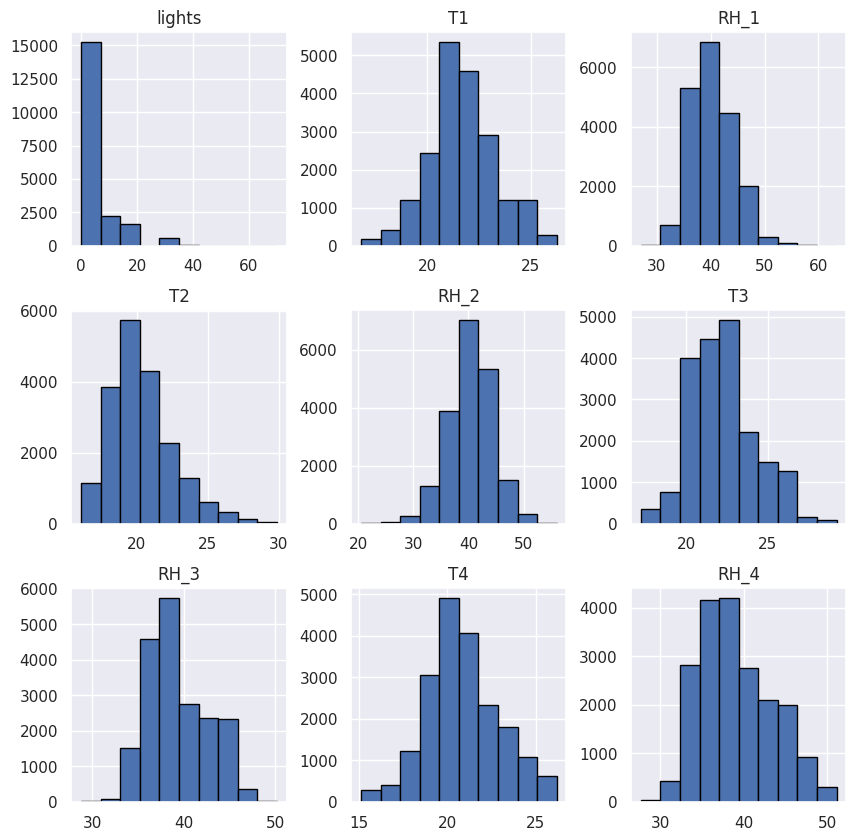

In [33]:
print(" \t\t\t\t\t\t ==== 1ER GRUPO ====\n")
df.hist(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 
           'T3', 'RH_3', 'T4', 'RH_4'],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

 						 ==== 2DO GRUPO ====



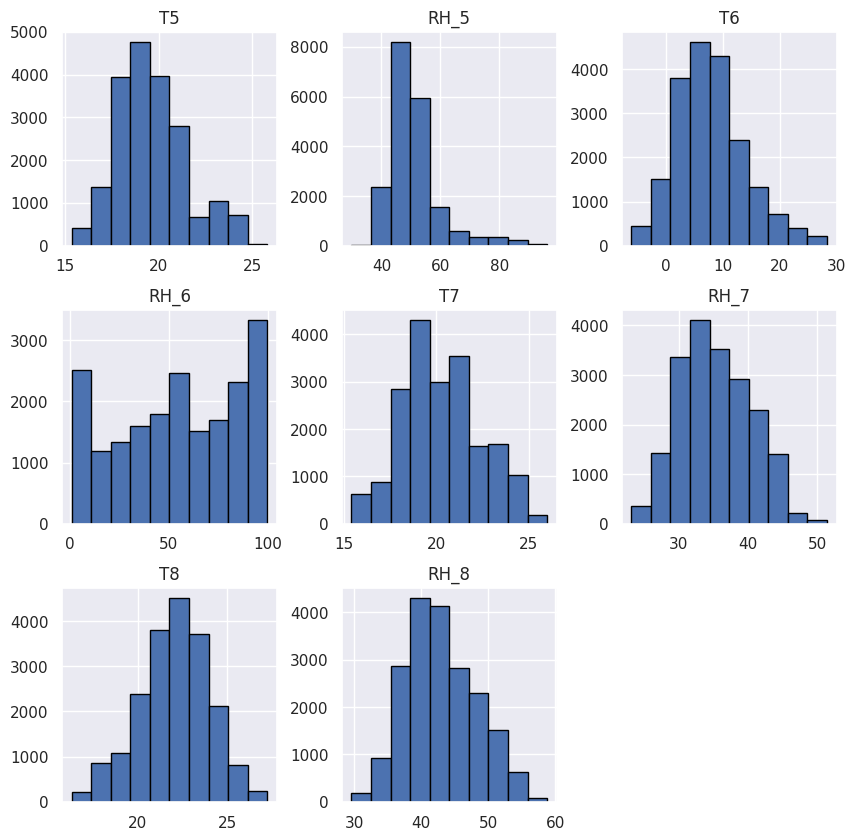

In [34]:
print(" \t\t\t\t\t\t ==== 2DO GRUPO ====\n")
df.hist(['T5', 'RH_5', 'T6', 'RH_6', 
           'T7', 'RH_7', 'T8', 'RH_8'],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

 						 ==== 3ER GRUPO ====



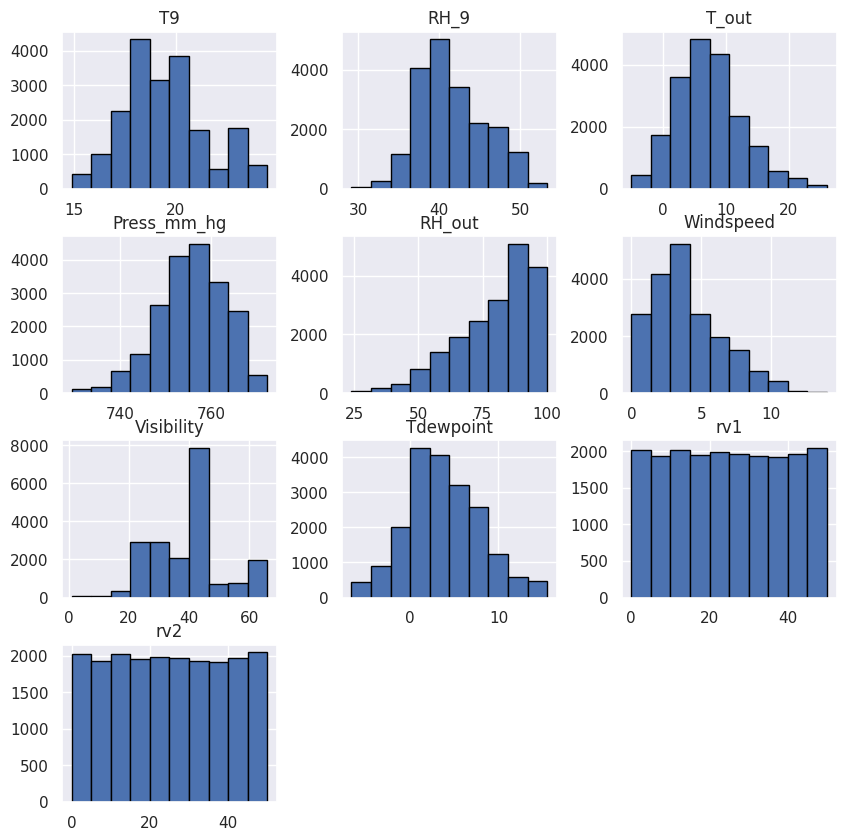

In [35]:
print(" \t\t\t\t\t\t ==== 3ER GRUPO ====\n")
df.hist(['T9', 'RH_9', 'T_out', 'Press_mm_hg', 
           'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Inspección de variables predictoras correlacionadas

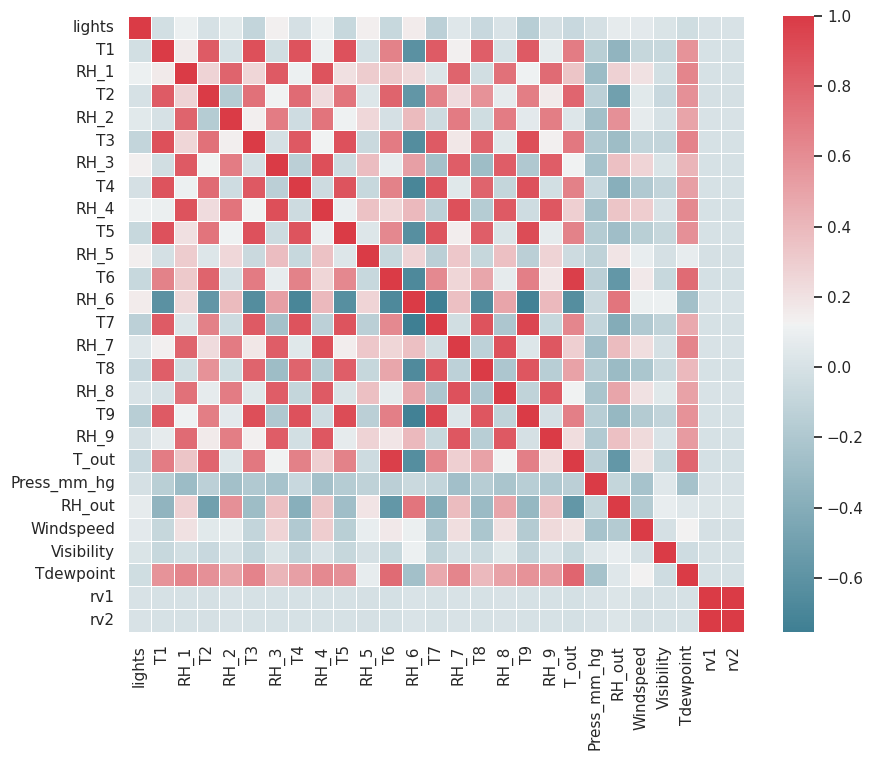

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
corr = x.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5)
plt.show() 

## Función para la detección de función correlación

In [37]:
def corr_feature_detect(data, threshold):
     
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() # valor absoluto del coef corr
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] # eliminar la diagonal
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            # encontrar todas las características correlacionadas con una sola característica
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            # agregar el bloque de características a la lista
            correlated_groups.append(correlated_block)
    return correlated_groups

## Invocando la función

In [38]:
corr = corr_feature_detect(data=x,threshold=0.95)
for i in corr:
    print(i,'\n')

  feature1 feature2      corr
0    T_out       T6  0.974787 



### La función ha detectado una correlación entre las variables "T_out" y "T6" del 97%
A continuación, vamos a analizar éstas variables con gráficas de dispersión, y aplicando una prueba de correlación no paramétrica, dado que algunas de ellas no muestran una distribución normal.

In [41]:
#Funciones requeridas para implementar un arbol de decisión para regresión y las métricas de evaluación
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Entrenamiento del modelo
#clf = tree.DecisionTreeRegressor(max_depth=20)

## ======================================================================================================================
"""

Se buscando los valores por defecto del método buscando una mejor convergencia y tratar de evitar el sobreajuste

* max_depth: Define la profundidad máxima del árbol de decisión.
* min_samples_split: Define el número mínimo de ejemplos necesarios para dividir un nodo interno.
* min_samples_leaf: Define el número mínimo de ejemplos que deben estar en una hoja.
* max_features: Define el número máximo de características que se considerarán al buscar la mejor división.
* random_state: Controla la aleatoriedad en la construcción del árbol


"""

clf = tree.DecisionTreeRegressor(min_samples_split=8, min_samples_leaf=5, max_features=10, random_state=420);

clf.fit(Xtrain, Ytrain)

DecisionTreeRegressor(max_features=10, min_samples_leaf=5, min_samples_split=8,
                      random_state=420)

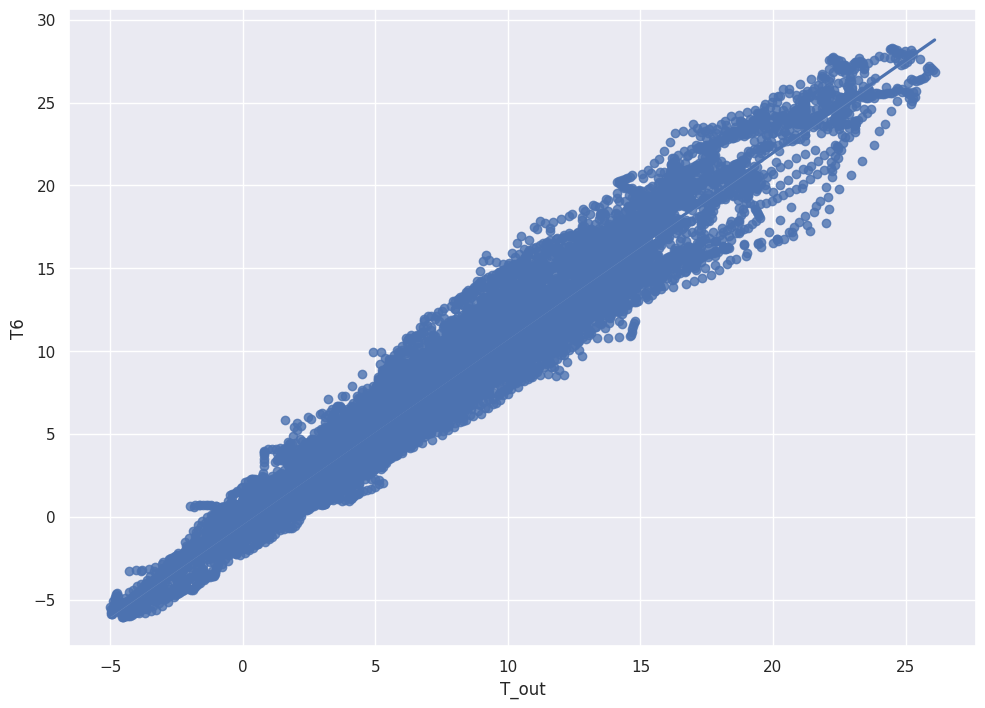

In [42]:
from pandas.plotting import scatter_matrix

#Explorando un poco más la relación entre mean T_out y T6
sns.regplot(x='T_out', y='T6', data=x);
sns.set(rc={'figure.figsize':(2,5)})
plt.show()

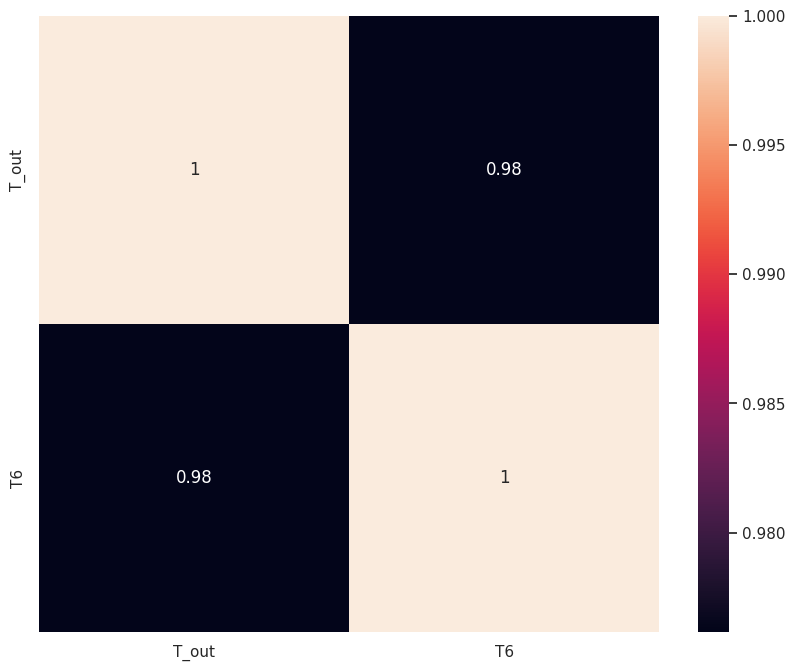

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
corr = x[['T_out', 'T6']].corr(method='spearman')
sns.heatmap(corr, annot=True)
plt.show() 

### La variable "T_out"está correlacionada de acuerdo al coeficiente de correlación de Spearman con la variable "T6", por lo tanto se debe eliminar del estudio.

In [44]:
x.drop(['T_out'], axis=1, inplace = True)
#Elimina las variables correlacionadas del estudio

# Seleccion de caracteristica - Filter

## Filtro basado en correlación

In [45]:
corr_matrix = df.corr(method='spearman')
corr_matrix = corr_matrix.abs().unstack()
corr_matrix['Appliances'].sort_values(ascending=False)   

Appliances     1.000000
T2             0.305091
lights         0.302420
RH_out         0.269086
T1             0.244049
T6             0.242477
T8             0.236147
RH_6           0.229734
RH_8           0.217236
T3             0.216852
T_out          0.215504
T4             0.207153
T5             0.185846
T7             0.181876
T9             0.166976
RH_9           0.164553
RH_2           0.119736
RH_7           0.119409
Windspeed      0.112320
Press_mm_hg    0.096176
Tdewpoint      0.075221
RH_1           0.060519
RH_3           0.057066
RH_5           0.044904
RH_4           0.020233
rv1            0.009289
rv2            0.009289
Visibility     0.003546
dtype: float64

### No se obseva una fuerte relación de las variables predictoras con respecto a la variable a predecir. 

# Implementación de los modelos de predicción

División del conjunto de datos de ejemplos en un conjunto para entrenamiento, y otro para prueba

In [40]:
from sklearn.model_selection import train_test_split

#Partición del conjunto de datos en entrenamiento y prueba. Un 30% de los datos totales se reserva para prueba
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3,random_state=420)

In [46]:
print("Cantidad de ejemplos para entrenamiento: ", len(Xtrain))
print("Cantidad de ejemplos para prueba: ", len(Xtest))

Cantidad de ejemplos para entrenamiento:  13814
Cantidad de ejemplos para prueba:  5921


### ====================================================================================

## * TREE
Se utilizará la clase DecisionTreeRegressor para construir un árbol de decisión que luego se evalúa en el conjunto de datos reservado para prueba

## Evaluación del modelo entrenado en el conjunto de datos de entrenamiento y prueba

In [24]:
Ytrain_predict = clf.predict(Xtrain)
rmse = (np.sqrt(mean_squared_error(Ytrain, Ytrain_predict)))
r2 = r2_score(Ytrain, Ytrain_predict)

print("El rendimiento del modelo para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 la puntuación es {}'.format(r2))
print("\n")


El rendimiento del modelo para el conjunto de entrenamiento.
--------------------------------------
RMSE es 53.59476930643022
R2 la puntuación es 0.7142278964624965




## Evaluación del modelo para el conjunto de pruebas

In [25]:
Ytest_predict = clf.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(Ytest, Ytest_predict)))
r2 = r2_score(Ytest, Ytest_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 96.8677010547772
R2 score is 0.18921865470081822


## Grafica

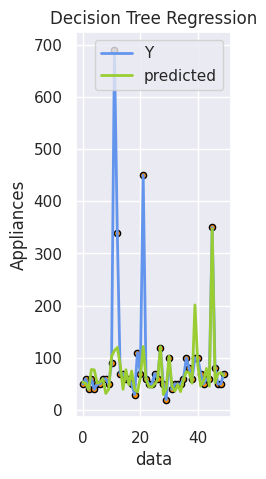

In [26]:
# Plot the results
x1 =  np.arange(0.0, 50)[:, np.newaxis]
plt.figure()
plt.scatter(x1, Ytest[:50], s=20, edgecolor="black", c="darkorange")
plt.plot(x1, Ytest[:50], color="cornflowerblue", label="Y", linewidth=2)
plt.plot(x1, Ytest_predict[:50], color="yellowgreen", label="predicted", linewidth=2)
plt.xlabel("data")
plt.ylabel("Appliances")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### ====================================================================================

## * Random_Forest

Se utiliza la clase RandomForestRegressor para construir un modelo ensamblado, conformado por varios árboles de decisión, en los resultados se puede ver que el modelo final no queda tan sobreajustado a los datos de entrenamiento, y tiene una mejor evaluación en los datos reservados para la prueba

In [27]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=90, max_depth=20, min_samples_split=10, min_samples_leaf=10, max_features=5, random_state=42)

#Entrenar el modelo en tus datos
regr.fit(Xtrain, Ytrain)

RandomForestRegressor(max_depth=20, max_features=5, min_samples_leaf=10,
                      min_samples_split=10, n_estimators=90, random_state=42)

In [28]:
Ytrain_predict2 = regr.predict(Xtrain)
rmse = (np.sqrt(mean_squared_error(Ytrain, Ytrain_predict2)))
r2 = r2_score(Ytrain, Ytrain_predict2)

print("El rendimiento del modelo para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# evaluación del modelo para el conjunto de pruebas
Ytest_predict2 = regr.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(Ytest, Ytest_predict2)))
r2 = r2_score(Ytest, Ytest_predict2)

print("El rendimiento del modelo para el conjunto de pruebas.")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

El rendimiento del modelo para el conjunto de entrenamiento.
--------------------------------------
RMSE is 66.53074107569968
R2 score is 0.5596279550991967


El rendimiento del modelo para el conjunto de pruebas.
--------------------------------------
RMSE is 84.87892019763693
R2 score is 0.3774912588869117


## Grafica

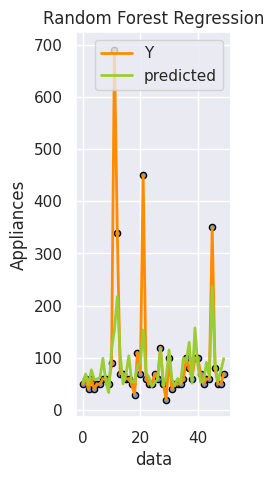

In [29]:
# Plot the results
X =  np.arange(0.0, 50)[:, np.newaxis]
plt.figure()
plt.scatter(X, Ytest[:50], s=20, edgecolor="black", c="cornflowerblue")
plt.plot(X, Ytest[:50], color="darkorange", label="Y", linewidth=2)
plt.plot(X, Ytest_predict2[:50], color="yellowgreen", label="predicted", linewidth=2)
plt.xlabel("data")
plt.ylabel("Appliances")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

## Ajustando los hiperparámetros del modelo con GridSearchCV

In [2]:
from sklearn.model_selection import GridSearchCV

### Ajustando Parametros para tree

In [31]:
#param_grid_tree = [{'criterion' : ['squared_error', 'absolute_error'], 'min_samples_split':[30, 40, 50]}]
#===============================================================================================================
# Definir una cuadrícula de parámetros a probar


param_grid_tree = [
    {
        'min_samples_split': [5, 8, 11, 13, 15, 20],
        'min_samples_leaf': [3, 5, 8, 10, 12],
        'max_features': [5, 8, 10, 12, 15],
        'max_depth': [20, 40, 60, 80, 100, 120, 140],
        'random_state': [420, 421, 422, 423, 424, 425]
    }
]

In [32]:
treeModel = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(treeModel, param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain, Ytrain)

# n_jobs=-1 para que se utilicen todos los núcleos de CPU disponibles para acelerar el proceso de búsqueda de parámetros.

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [20, 40, 60, 80, 100, 120, 140],
                          'max_features': [5, 8, 10, 12, 15],
                          'min_samples_leaf': [3, 5, 8, 10, 12],
                          'min_samples_split': [5, 8, 11, 13, 15, 20],
                          'random_state': [420, 421, 422, 423, 424, 425]}],
             scoring='neg_mean_squared_error')

In [33]:
print(grid_search.best_params_)

{'max_depth': 40, 'max_features': 10, 'min_samples_leaf': 12, 'min_samples_split': 5, 'random_state': 422}


In [34]:
Ytest_treeModel_predict = grid_search.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(Ytest, Ytest_treeModel_predict)))
r2 = r2_score(Ytest, Ytest_treeModel_predict)

print("El rendimiento del modelo para el conjunto de pruebas.")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

El rendimiento del modelo para el conjunto de pruebas.
--------------------------------------
RMSE is 92.37009936482306
R2 score is 0.26276052067547395


### Ajustando RandomForest

In [35]:
#param_grid_Rf = [{'n_estimators': [50, 70, 100], 'criterion': ['squared_error', 'absolute_error'],'max_depth': [30, 50, 22]}]

param_grid_Rf = {
                    'n_estimators': [100, 125, 150, 175, 200],
                    'min_samples_split': [4, 8, 12, 16, 20],
                    'min_samples_leaf': [2, 4, 5, 8, 10],
                    'max_features': [0.5]
                   }

* Obteniendo los mejores params para RandomForest

In [36]:
RfModel = RandomForestRegressor()
grid_search = GridSearchCV(RfModel, param_grid_Rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain, Ytrain)
print(grid_search.best_params_)

{'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 125}


In [37]:
Ytest_RfModel_predict = grid_search.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(Ytest, Ytest_RfModel_predict)))
r2 = r2_score(Ytest, Ytest_RfModel_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 76.70094538613391
R2 score is 0.4916682971313192


### ====================================================================================

## * NEURAL NETWORK (Redes Neuronales)

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

### Ajustando parametros para MLP

In [39]:
param_grid_mlp = [{'hidden_layer_sizes' : [(30, 30, 30), (60, 60, 60), (12, 24, 32)], 'max_iter':[500, 700, 1000], 'alpha': [0.0001, 0.001]}]

### Escalamiento de los datos de entrada a valores entre 0 y 1

In [40]:
min_max_scaler = preprocessing.MinMaxScaler()
Xtrain = min_max_scaler.fit_transform(Xtrain)
Xtest  = min_max_scaler.fit_transform(Xtest)

* Obteniendo los mejores params para RandomForest

In [41]:
MLPModel = MLPRegressor()
grid_mlp = GridSearchCV(MLPModel, param_grid_mlp, cv=5, scoring='neg_mean_squared_error')
grid_mlp.fit(Xtrain, Ytrain)
print(grid_mlp.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

{'alpha': 0.001, 'hidden_layer_sizes': (60, 60, 60), 'max_iter': 1000}


In [42]:
Ytrain_predict_mlp = grid_mlp.predict(Xtrain)
rmse = (np.sqrt(mean_squared_error(Ytrain, Ytrain_predict_mlp)))
r2 = r2_score(Ytrain, Ytrain_predict_mlp)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Ytest_predict_mlp = grid_mlp.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(Ytest, Ytest_predict_mlp)))
r2 = r2_score(Ytest, Ytest_predict_mlp)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 77.30877939675841
R2 score is 0.4053893923020605


The model performance for testing set
--------------------------------------
RMSE is 90.9190641359715
R2 score is 0.28574107539977533


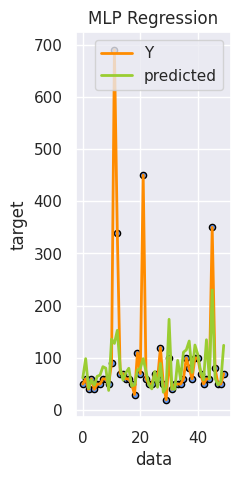

In [43]:
g =  np.arange(0.0, 50)[:, np.newaxis]
plt.figure()
plt.scatter(g, Ytest[:50], s=20, edgecolor="black", c="cornflowerblue")
plt.plot(g, Ytest[:50], color="darkorange", label="Y", linewidth=2)
plt.plot(g, Ytest_predict_mlp[:50], color="yellowgreen", label="predicted", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("MLP Regression")
plt.legend()
plt.show()

### ====================================================================================

## * DEED

### Escalamiento de los datos de entrada

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Escalar los datos
datos_escalados = scaler.fit_transform(x)

# Imprimir los datos originales y los datos escalados
print("Datos originales:\n", x)
print("\nDatos escalados:\n", datos_escalados)

Datos originales:
        lights         T1       RH_1         T2       RH_2         T3  \
0          30  19.890000  47.596667  19.200000  44.790000  19.790000   
1          30  19.890000  46.693333  19.200000  44.722500  19.790000   
2          30  19.890000  46.300000  19.200000  44.626667  19.790000   
3          40  19.890000  46.066667  19.200000  44.590000  19.790000   
4          40  19.890000  46.333333  19.200000  44.530000  19.790000   
...       ...        ...        ...        ...        ...        ...   
19730       0  25.566667  46.560000  25.890000  42.025714  27.200000   
19731       0  25.500000  46.500000  25.754000  42.080000  27.133333   
19732      10  25.500000  46.596667  25.628571  42.768571  27.050000   
19733      10  25.500000  46.990000  25.414000  43.036000  26.890000   
19734      10  25.500000  46.600000  25.264286  42.971429  26.823333   

            RH_3         T4       RH_4         T5  ...       RH_8         T9  \
0      44.730000  19.000000  45.5666

# Partición nuevos datos de entrenamiento y prueba

In [45]:
#Partición del conjunto de datos en entrenamiento y prueba. Un 30 por ciento de los datos totales se reserva para prueba
X_train,X_test,Y_train,Y_test = train_test_split(datos_escalados, y,test_size=0.3,random_state=420)

In [46]:
print("Los datos de entrenamiento contienen %d registros " % (len(Xtrain)))
print("Los datos de prueba contienen %d registros " % (len(Xtest)))

Los datos de entrenamiento contienen 13814 registros 
Los datos de prueba contienen 5921 registros 


## Perceptron multicapa

In [6]:
from sklearn.neural_network import MLPRegressor

model_MPL = MLPRegressor()

* Parametros Iniciales

In [48]:
MPL_parameters = [{'hidden_layer_sizes': [20, 50, 100], 'max_iter': [1000], 'alpha': [0.01, 0.1]}]

* Buscando los mejores parametros

In [49]:
model_MPL = MLPRegressor()
grid_MPL1 = GridSearchCV(model_MPL, MPL_parameters, cv=5, scoring='neg_mean_squared_error')
grid_result_MPL1 = grid_MPL1.fit(X_train, Y_train)
print(grid_result_MPL1.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

{'alpha': 0.1, 'hidden_layer_sizes': 100, 'max_iter': 1000}


In [50]:
Ytest_MLP1_predict = grid_result_MPL1.predict(X_test)
mse = mean_squared_error(Y_test, Ytest_MLP1_predict)
r2 = r2_score(Y_test, Ytest_MLP1_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MSE is 90.9190641359715
R2 score is 0.20244268098342555


#### Prueba 2

In [51]:
#prueba 2
MPL_parameters = [{'hidden_layer_sizes' : [(50), (25, 25), (50,50)], 
                   'max_iter':[750, 1000, 1500], 
                   'alpha': [0.001, 0.01]}]

grid_MPL2 = GridSearchCV(model_MPL, MPL_parameters, cv=5, scoring='neg_mean_squared_error')
grid_result_MPL2 = grid_MPL2.fit(X_train, Y_train) 
print(grid_result_MPL2.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

{'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'max_iter': 1000}


In [52]:
Ytest_MLP2_predict = grid_result_MPL2.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Ytest_MLP2_predict)))
r2 = r2_score(Y_test, Ytest_MLP2_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 94.31135333459962
R2 score is 0.23144718809071407


#### Prueba 3

In [7]:
#prueba 3
MPL_parameters = [{'hidden_layer_sizes' : [(50, 50, 50), (75, 75, 50), (50, 50, 50, 50)], 
                   'max_iter':[1000, 1500, 2000], 
                   'alpha': [0.001, 0.01]}]

grid_MPL3 = GridSearchCV(model_MPL, MPL_parameters, cv=5, scoring='neg_mean_squared_error')
grid_result_MPL3 = grid_MPL3.fit(X_train, Y_train)

print('best prarams:', grid_MPL3.best_params_)

NameError: ignored

In [ ]:
Ytest_MLP3_predict = grid_result_MPL3.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Ytest_MLP3_predict)))
r2 = r2_score(Y_test, Ytest_MLP3_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# APLICANDO Keras

In [ ]:
from tensorflow import keras
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
Xtrain2, Xvalid, Ytrain2, Yvalid = train_test_split(X_train, Y_train, random_state=42)

print("Los datos de entrenamiento contienen %d registros " % (len(Xtrain2)))
print("Los datos de prueba contienen %d registros " % (len(Xvalid)))

In [ ]:

model = keras.models.Sequential([
    keras.layers.Dense(75, activation="relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(Xtrain2, Ytrain2, epochs=100, validation_data=(Xvalid, Yvalid))

mse_test = model.evaluate(X_test, Y_test)
print('MSE con datos de prueba is {}'.format(mse_test))


In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Dense(80, activation="relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(80, activation="relu"),
    keras.layers.Dense(80, activation="relu"),
    keras.layers.Dense(80, activation="sigmoid"),
    keras.layers.Dense(1)
])
model2.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model2.fit(Xtrain2, Ytrain2, epochs=100, validation_data=(Xvalid, Yvalid))

mse_test = model2.evaluate(X_test, Y_test)
print('MSE con datos de prueba is {}'.format(mse_test))